# Jimmy Wrangler - Data Explorer

 The main purpose is to predict how the houses are being sold on days when it rains and when it doesn't in Seattle. The data sets explored in this notebook are house sales data in King County, WA (in Seattle), and the the history of rainy days in Seattle. The chosen industry is real estate.

# Features

The features for the dataset kc_house_data.csv includes - id, date, price, bedrooms, bathrooms, sqft_living, sqft_lot, floors, waterfront, view, condition, grade, sqft_above, sqft_basement, yr_built, yr_renovated, zipcode, lat, long, sqft_living15, sqft_lot15.

The features for the dataset seattleWeather_1948-2017.csv includes - DATE, PRCP, TMAX, TMIN, RAIN.

# Purpose

The final goal of this project is to analyse the data and give a correlation between the two datasets.

* How the price of houses in King County, Seattle varies with different features like number of bedrooms, sqft_living, grade ?
* How the weather of Seattle plays a role in the number of houses being sold?

We can correlate as many features as we want and can get the results in graphical format.

# 1. Importing the required libraries

In [1]:
#Required libraries

import pandas as pd #to read/input/output the files in different formats
import numpy as np #for linear algebra operations
import matplotlib.pyplot as plt # to plot graphs
import seaborn as sns #for interactive graphs


# 2. Gathering King County, Seattle House Data

In [2]:
#Reading the csv files into dataframes.

df1 = pd.read_csv("../Datasets/kc_house_data.csv", encoding="latin-1")

In [3]:
df1.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


# 3. Some knowledge on the Data

In [4]:
df1.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [5]:
df1.shape

(21613, 21)

In [6]:
df1.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [7]:
#Calculating the null percentage of df1 dataframe's columns

df1_null_percentage = 100 * df1.isnull().sum()/len(df1)

df1_null_percentage #The percentages are very low and they don't make much difference.

id               0.0
date             0.0
price            0.0
bedrooms         0.0
bathrooms        0.0
sqft_living      0.0
sqft_lot         0.0
floors           0.0
waterfront       0.0
view             0.0
condition        0.0
grade            0.0
sqft_above       0.0
sqft_basement    0.0
yr_built         0.0
yr_renovated     0.0
zipcode          0.0
lat              0.0
long             0.0
sqft_living15    0.0
sqft_lot15       0.0
dtype: float64

# a. Houses count based on the grade

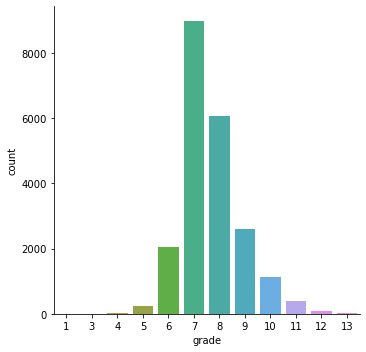

In [8]:
sns.catplot(x="grade", kind="count", data=df1)

# b. Distributed plot based on price

<AxesSubplot:xlabel='price'>

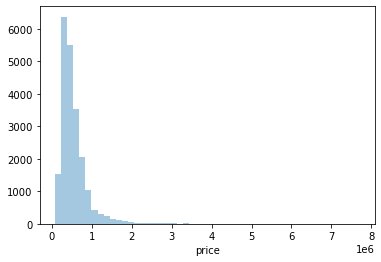

In [9]:
sns.distplot(df1['price'], bins=50, kde=False)

# c. Price of the houses based on number of bedrooms

(-0.5, 12.5, 0.0, 3500000.0)

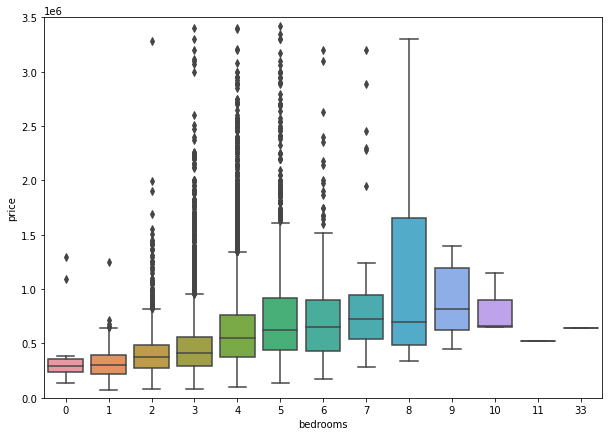

In [12]:

data = pd.concat([df1['price'], df1['bedrooms']], axis=1)
f, ax = plt.subplots(figsize=(10, 7))
fig = sns.boxplot(x="bedrooms", y="price", data=data)
fig.axis(ymin=0, ymax=3500000)

# d. Price based on grades

(-0.5, 11.5, 0.0, 3500000.0)

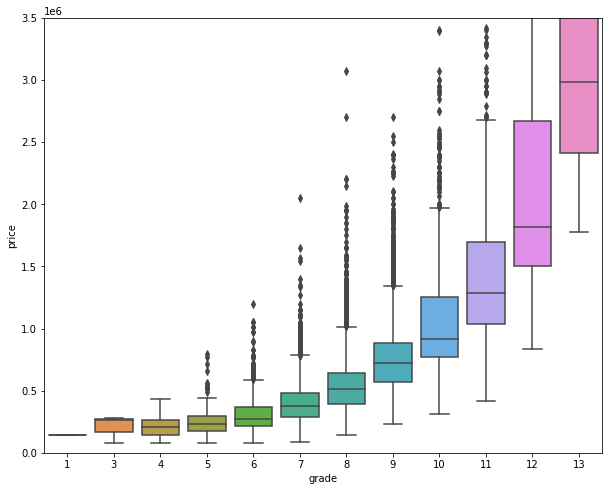

In [15]:
var = 'grade'
data = pd.concat([df1['price'], df1['grade']], axis=1)
f, ax = plt.subplots(figsize=(10, 8))
fig = sns.boxplot(x='grade', y="price", data=data)
fig.axis(ymin=0, ymax=3500000)

Observation:  As the grade increases, the price of the house increases. Number of bedrooms also shows increase in the price to some extent.

# e. Scatter plot with sqft_living15 and price

<AxesSubplot:xlabel='sqft_living15', ylabel='price'>

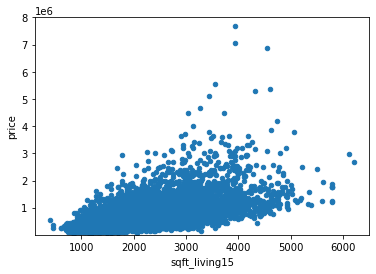

In [16]:

data = pd.concat([df1['price'], df1['sqft_living15']], axis=1)
data.plot.scatter(x='sqft_living15', y='price', ylim=(3,8000000))

# 4. Gathering Seattle Weather Data

In [17]:
#Reading the csv files into dataframes.

df2 = pd.read_csv("../Datasets/seattleWeather_1948-2017.csv", encoding="latin-1")

In [18]:
df2.head()

,DATE,PRCP,TMAX,TMIN,RAIN
0,1948-01-01,0.47,51,42,True
1,1948-01-02,0.59,45,36,True
2,1948-01-03,0.42,45,35,True
3,1948-01-04,0.31,45,34,True
4,1948-01-05,0.17,45,32,True


# 5. Some Knowledge on the Data

In [19]:
df2.columns

Index(['DATE', 'PRCP', 'TMAX', 'TMIN', 'RAIN'], dtype='object')

In [20]:
df2.shape

(25551, 5)

In [21]:
df2.describe()

,PRCP,TMAX,TMIN
count,25548.000000,25551.000000,25551.000000
mean,0.106222,59.544206,44.514226
std,0.239031,12.772984,8.892836
min,0.000000,4.000000,0.000000
25%,0.000000,50.000000,38.000000
50%,0.000000,58.000000,45.000000
75%,0.100000,69.000000,52.000000
max,5.020000,103.000000,71.000000


In [22]:
#Picking up only Day from the format DD-MM-YYYY format
df1["date"] = pd.DatetimeIndex(df1['date'])
df2["DATE"] = pd.DatetimeIndex(df2['DATE'])


In [23]:
df1.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [24]:
df2.head()

,DATE,PRCP,TMAX,TMIN,RAIN
0,1948-01-01,0.47,51,42,True
1,1948-01-02,0.59,45,36,True
2,1948-01-03,0.42,45,35,True
3,1948-01-04,0.31,45,34,True
4,1948-01-05,0.17,45,32,True


# 6. Merging the two datasets

In [25]:
#df is the final dataframe after merging df1 and df2

df = pd.merge(df1, df2, left_on='date', right_on='DATE', how='inner')

In [26]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,zipcode,lat,long,sqft_living15,sqft_lot15,DATE,PRCP,TMAX,TMIN,RAIN
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,98178,47.5112,-122.257,1340,5650,2014-10-13,0.3,70,50,True
1,4036801170,2014-10-13,380000.0,4,1.75,1760,7300,1.0,0,0,...,98008,47.6034,-122.125,1680,7500,2014-10-13,0.3,70,50,True
2,1310900260,2014-10-13,318888.0,4,1.75,2320,12000,1.0,0,0,...,98032,47.3644,-122.280,2120,9880,2014-10-13,0.3,70,50,True
3,1373800295,2014-10-13,1450000.0,3,3.00,4380,6320,2.0,0,3,...,98199,47.6452,-122.411,3080,7680,2014-10-13,0.3,70,50,True
4,5102400105,2014-10-13,400000.0,4,1.00,1420,4875,1.5,0,0,...,98115,47.6942,-122.321,1110,5413,2014-10-13,0.3,70,50,True


In [27]:
df.shape

(21613, 26)

In [28]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'DATE', 'PRCP', 'TMAX',
       'TMIN', 'RAIN'],
      dtype='object')

In [29]:
df_new = df[['price', 'bedrooms', 'sqft_living', 'bathrooms', 'DATE', 'date', 'grade', 'PRCP', 'TMAX', 'TMIN', 'RAIN']]

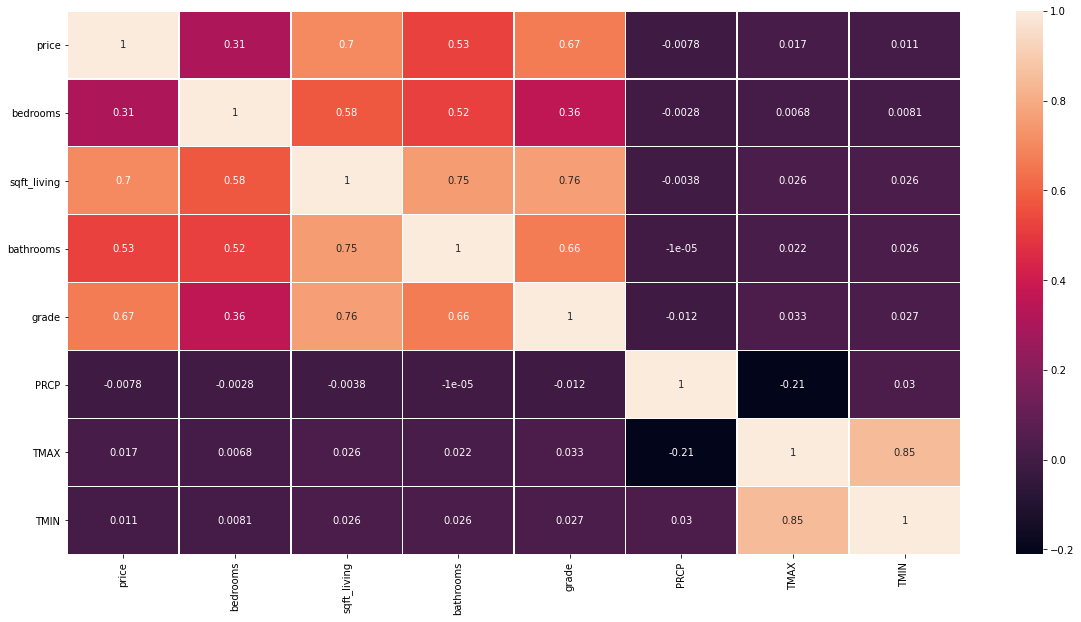

In [30]:
#To find a correlation between different features.

sns.heatmap(df_new.corr(), annot=True, linewidth=0.5)
fig = plt.gcf()
fig.set_size_inches(20,10)
plt.show()

In [31]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'DATE', 'PRCP', 'TMAX',
       'TMIN', 'RAIN'],
      dtype='object')

# 7. Connection between Weather and houses brought in Seattle

# a. Houses count based on PRCP

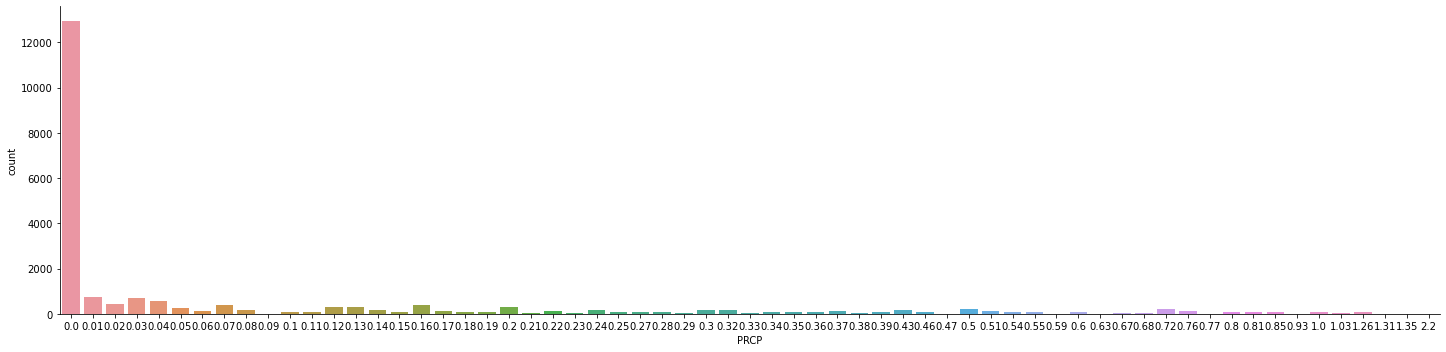

In [32]:
sns.catplot(x='PRCP', kind='count', aspect=4, data=df)

# b. Houses brought during Rain and without Rain

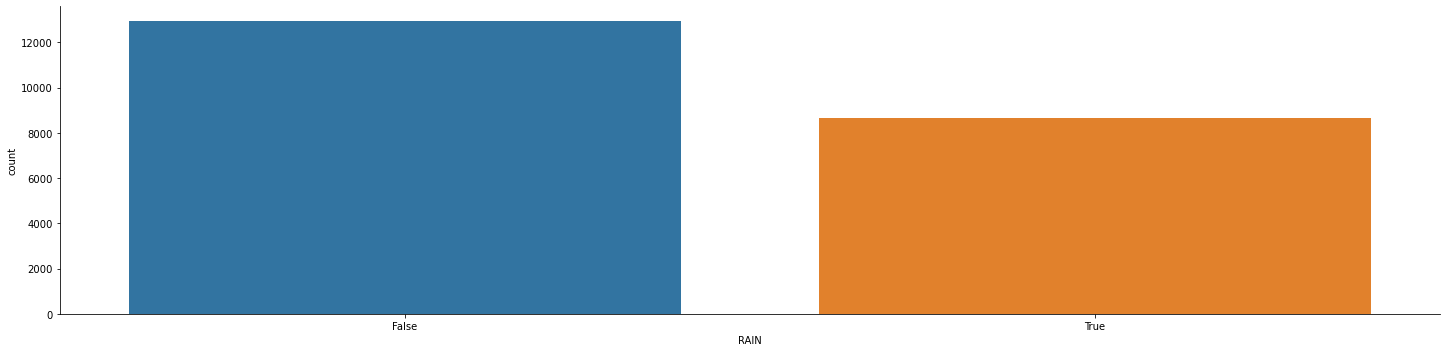

In [34]:
sns.catplot(x='RAIN', kind='count', aspect=4, data=df)

# c. Pie Chart showing the percentage of houses bought during rain and without rain.

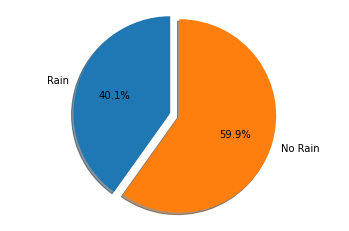

In [35]:
labels = 'Rain' ,'No Rain'
rainSize = len(df.loc[df['RAIN'] == True])
noRainSize = len(df.loc[df['RAIN'] == False])

sizes = [rainSize, noRainSize]
explode = (0, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()